<a href="https://colab.research.google.com/github/QuocTrinh-coder/Loan_Approval_Predictor/blob/main/Loan_Approval_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv("loan_approval_dataset.csv")

In [ ]:
df.drop(columns = "loan_id", inplace = True)

In [ ]:
df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
df.dtypes
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
df["Moveable_assets"] = df[" bank_asset_value"] + df[" luxury_assets_value"]
df["Immovable_assets"] = df[" residential_assets_value"] + df[" commercial_assets_value"]

In [ ]:
df.drop(columns = [" bank_asset_value", " luxury_assets_value", " residential_assets_value", " commercial_assets_value"],inplace = True)

<Axes: xlabel=' education', ylabel=' income_annum'>

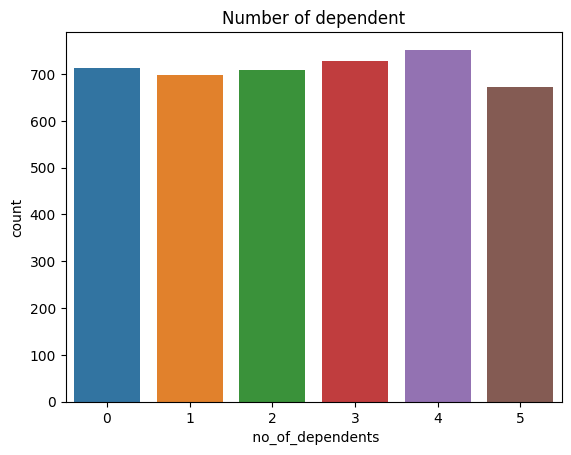

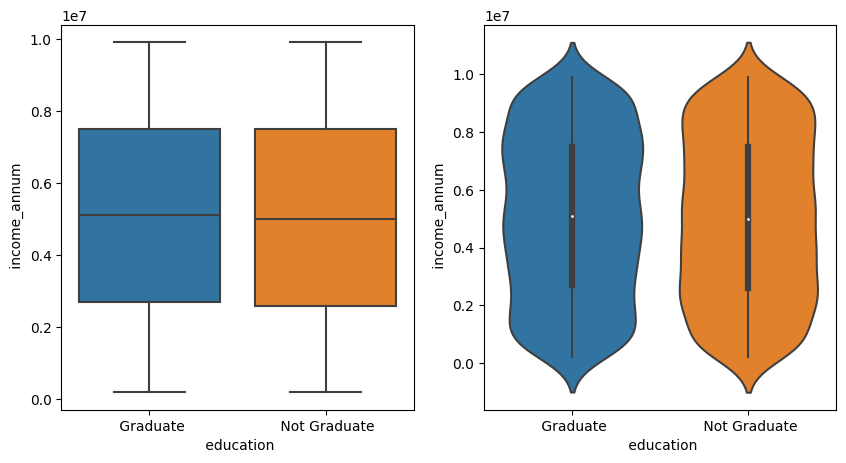

In [ ]:
df.describe()
sns.countplot(x = ' no_of_dependents', data = df).set_title("Number of dependent")
fig, ax = plt.subplots(1, 2 , figsize = (10, 5))
sns.boxplot(x = " education", y = " income_annum", data = df, ax = ax[0])
sns.violinplot(x = " education", y = " income_annum", data = df, ax = ax[1]) # more fluctuation in graduate in violin plot because the width

Text(0.5, 1.0, 'Self-Employ')

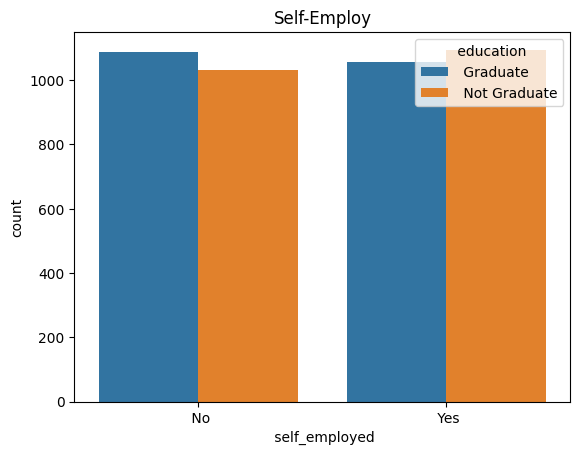

In [ ]:
sns.countplot(x = " self_employed", data = df, hue = " education").set_title("Self-Employ")

Text(0.5, 1.0, 'Loan amount vs loan 10 years')

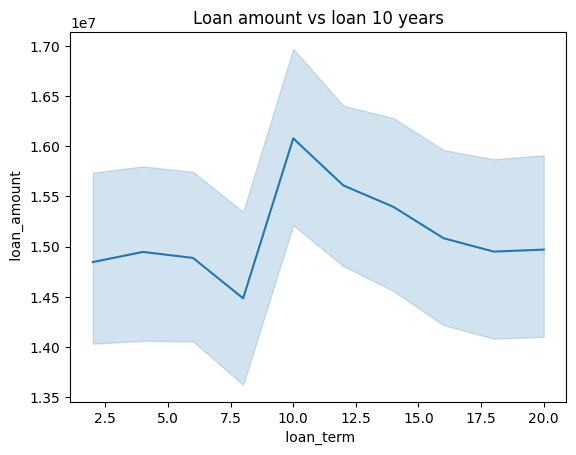

In [ ]:
sns.lineplot(x = " loan_term", y = " loan_amount", data = df).set_title("Loan amount vs loan 10 years")

<Axes: xlabel=' cibil_score', ylabel='Count'>

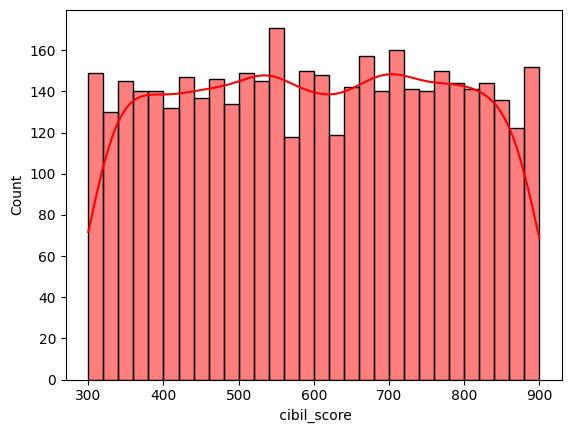

In [ ]:
sns.histplot(df[" cibil_score"], bins = 30, kde = True, color= "red")

<Axes: xlabel='Immovable_assets', ylabel='Count'>

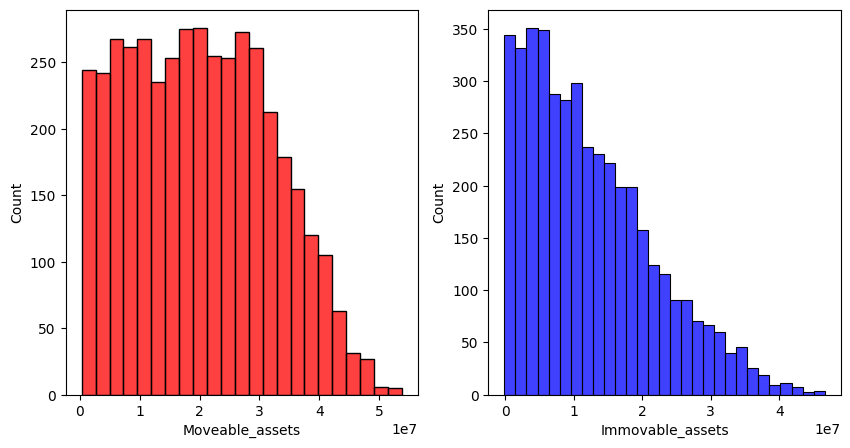

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (10, 5))
sns.histplot(df["Moveable_assets"], ax = ax[0], color = "red")
sns.histplot(df["Immovable_assets"], ax = ax[1], color = "blue")

<Axes: xlabel=' no_of_dependents', ylabel='count'>

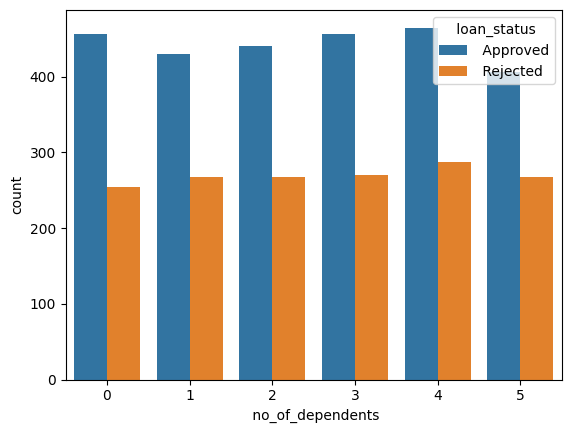

In [ ]:
sns.countplot(x = " no_of_dependents", data = df, hue = " loan_status")

Text(0.5, 1.0, 'Education vs Loan Stat')

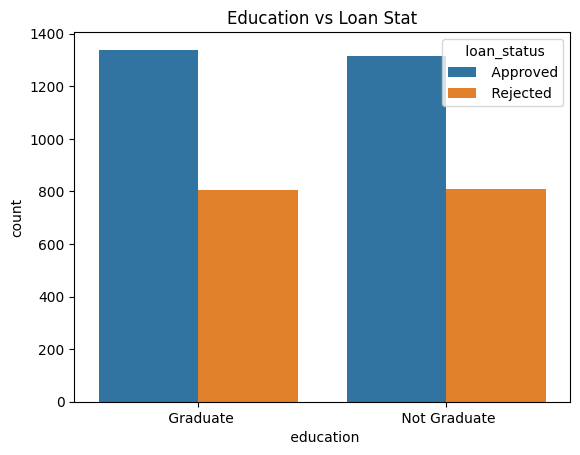

In [ ]:
sns.countplot(x = " education", data = df, hue = " loan_status").set_title("Education vs Loan Stat")

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

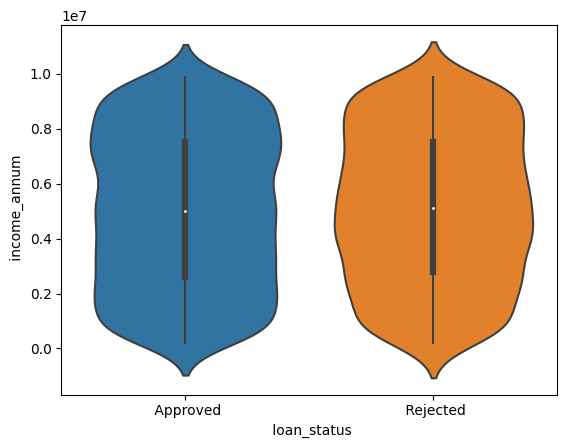

In [ ]:
sns.violinplot(x = " loan_status", y = " income_annum", data = df) # more fluctuation in graduate in violin plot because the width

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

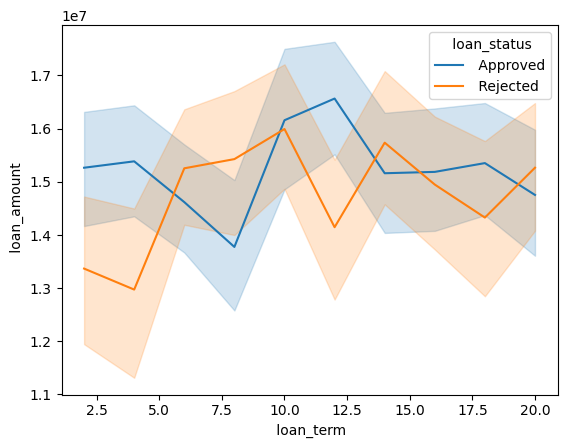

In [ ]:
sns.lineplot(x = " loan_term", y = " loan_amount", data =df, hue = " loan_status")

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

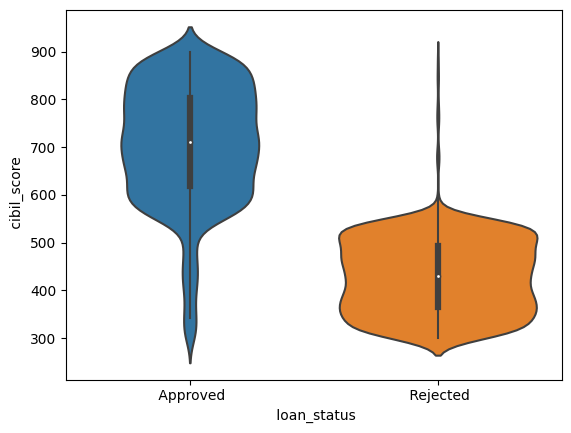

In [ ]:
sns.violinplot(x = " loan_status", y = " cibil_score", data = df) # more fluctuation in graduate in violin plot because the width

<Axes: xlabel='Immovable_assets', ylabel='Count'>

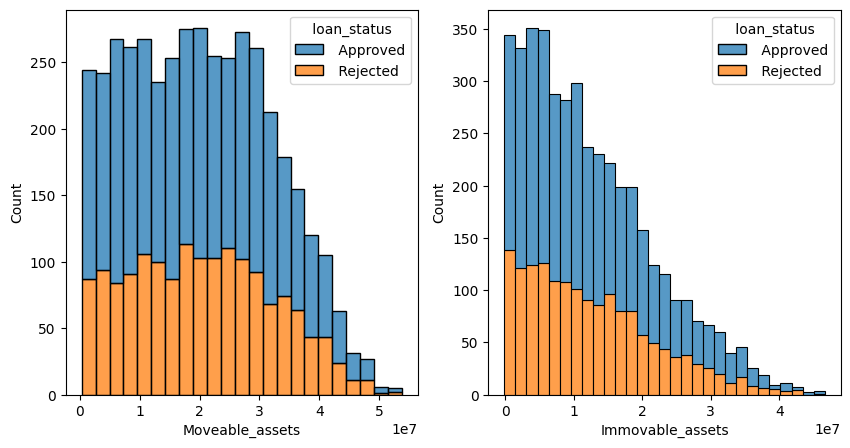

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (10,5))
sns.histplot(x= "Moveable_assets", data = df, ax = ax[0], hue = " loan_status", multiple = "stack")
sns.histplot(x= "Immovable_assets", data = df, ax = ax[1], hue = " loan_status", multiple = "stack")

<Axes: >

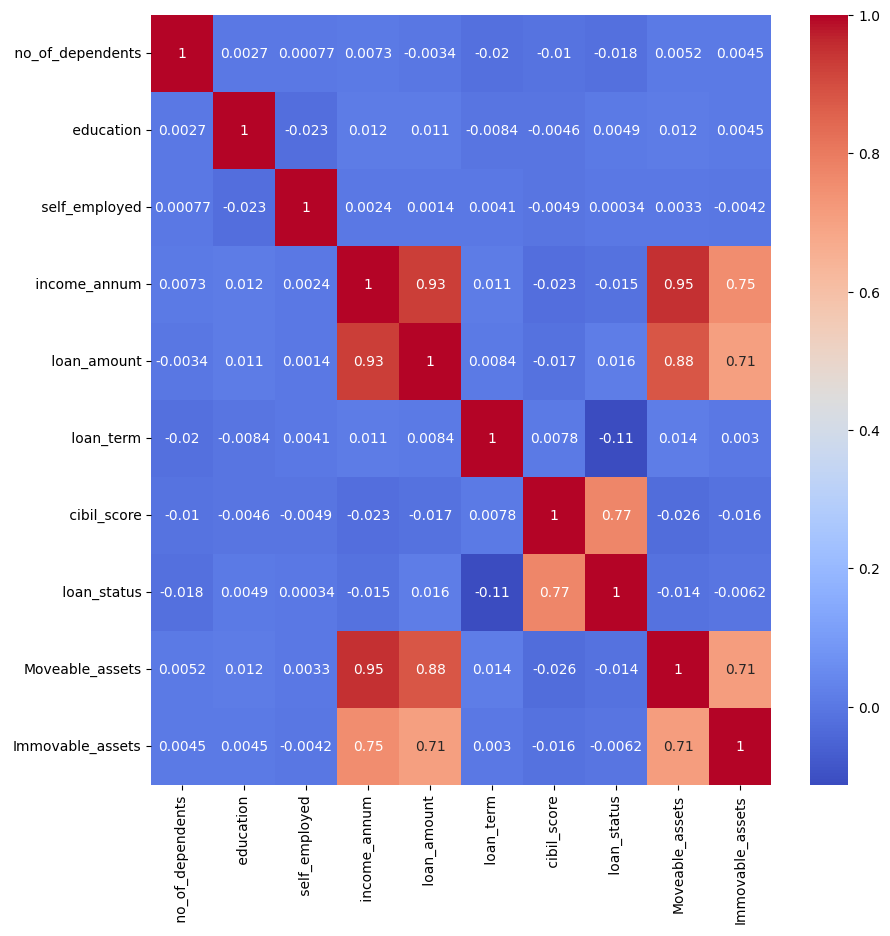

In [ ]:
# labeling coding
df[" education"] = df[" education"].map({" Not Graduate" : 0, " Graduate": 1})
df[" self_employed"] = df[" self_employed"].map({" No" : 0, " Yes": 1})
df[" loan_status"] = df[" loan_status"].map({" Rejected" : 0, " Approved": 1})
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, cmap = "coolwarm")


Text(0.5, 1.0, 'loan_amount vs income_annum')

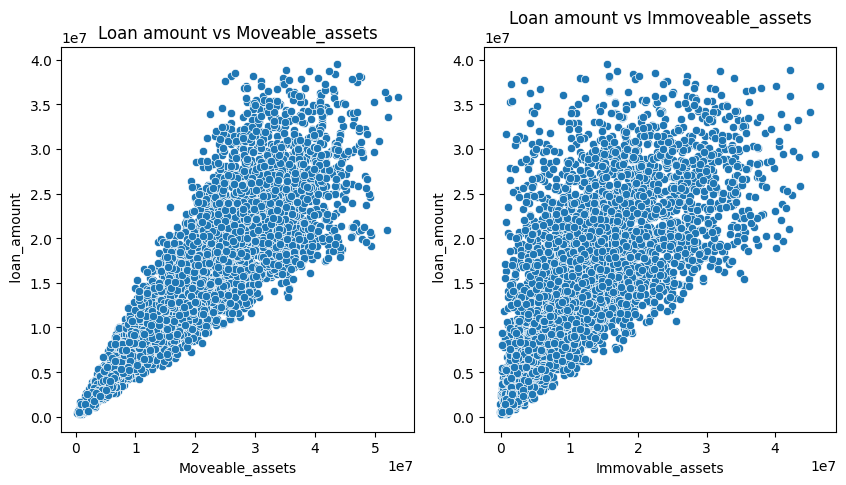

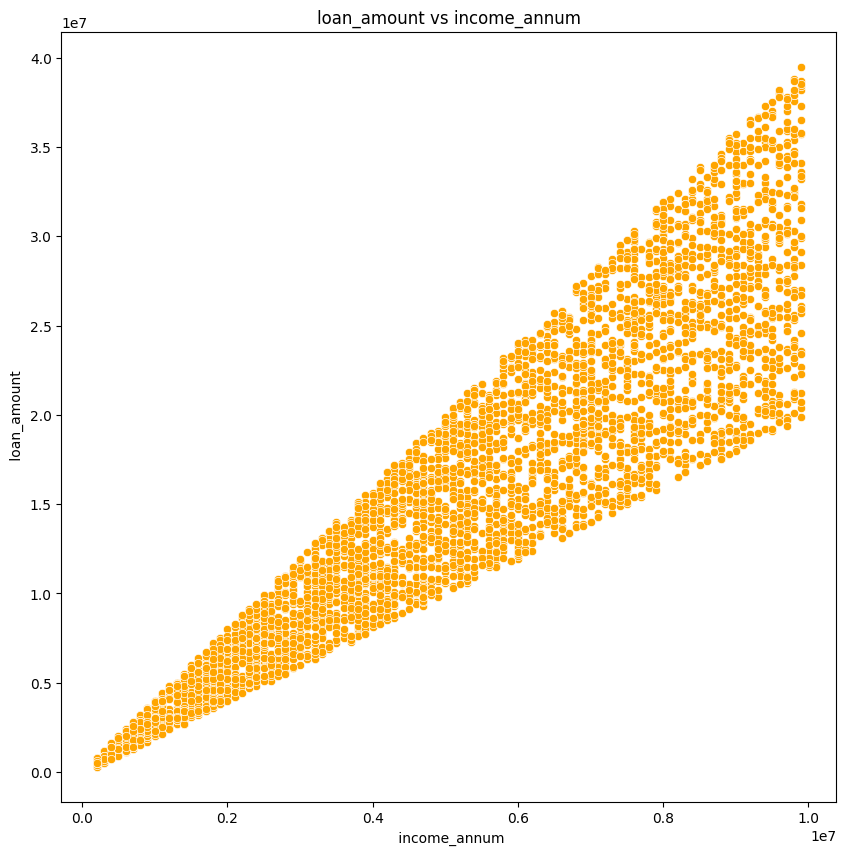

In [ ]:
fig,ax = plt.subplots(1,2, figsize = (10,5))
sns.scatterplot(x = "Moveable_assets", y = " loan_amount", data = df, ax = ax[0]).set_title("Loan amount vs Moveable_assets")
sns.scatterplot(x = "Immovable_assets", y = " loan_amount", data = df, ax = ax[1]).set_title("Loan amount vs Immoveable_assets")

plt.figure(figsize = (10,10))
sns.scatterplot(x = " income_annum", y = " loan_amount", data = df, color = "orange").set_title("loan_amount vs income_annum")

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(" loan_status", axis = 1), df[" loan_status"], test_size = 0.2, random_state = 42)

# model build
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
print(dtree.score(x_train, y_train))
dtree_pred = dtree.predict(x_test)
MSE = (1/len(df)) * (sum(y_test - dtree_pred))**2
print(MSE)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print(rfc.score(x_train, y_train))
rfc_pred = rfc.predict(x_test)
MSE2 = (1/len(df)) * (sum(y_test - rfc_pred))**2
print(MSE2)

1.0
0.00023424689622862497
1.0
0.023424689622862496


<ipython-input-29-ff2885f20f49>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x = y_test, hist = False, color = "r", label = "Actual Value")


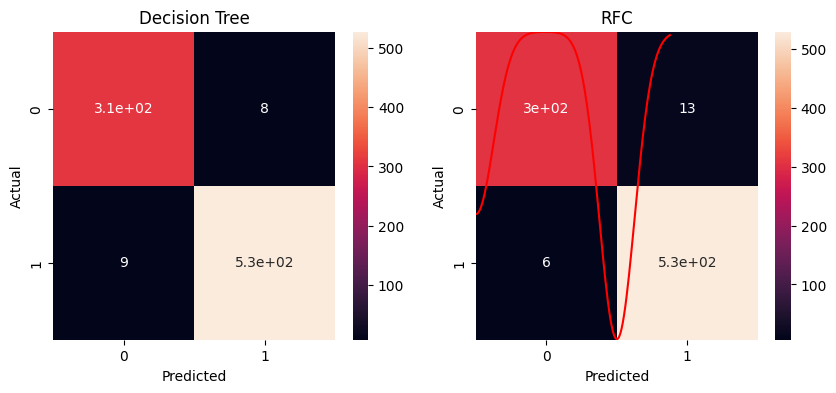

In [ ]:
fig, ax = plt.subplots(1,2 , figsize = (10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot = True, ax = ax[0]).set_title("Decision Tree")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot = True, ax = ax[1]).set_title("RFC")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")


Text(0.5, 1.0, 'Actual vs Fitted Values for RFC Calissifier')

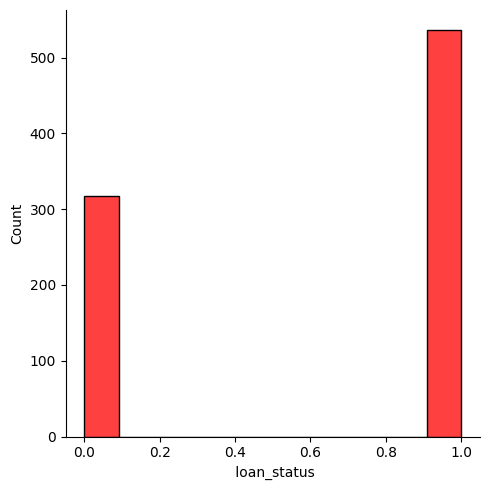

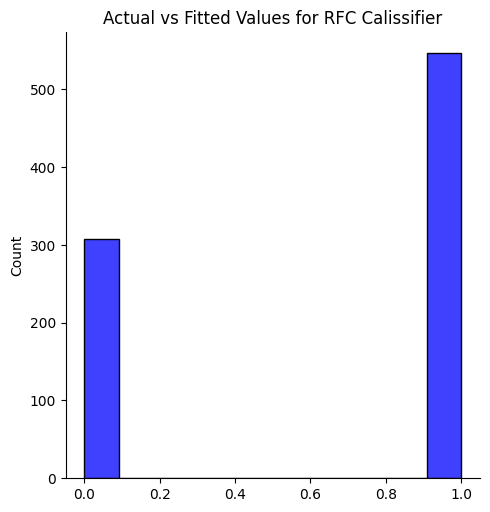

In [ ]:
ax = sns.displot(x = y_test, kind = "hist", color = "r", label = "Actual Value")
sns.displot(x = rfc_pred, kind = "hist", color = "b", label = "Fitted Values")
plt.title("Actual vs Fitted Values for RFC Calissifier")

In [ ]:
print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       318
           1       0.99      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       318
           1       0.97      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
print("R2 score: ", r2_score(y_test, dtree_pred))
print("MSE score: ", mean_squared_error(y_test, dtree_pred))
print("Mean Absolute Error score: ", mean_absolute_error(y_test, dtree_pred))

print("R2 score: ", r2_score(y_test, rfc_pred))
print("MSE score: ", mean_squared_error(y_test, rfc_pred))
print("Mean Absolute Error score: ", mean_absolute_error(y_test, rfc_pred))

R2 score:  0.9348657655120624
MSE score:  0.01522248243559719
Mean Absolute Error score:  0.01522248243559719
R2 score:  0.9098141368628555
MSE score:  0.02107728337236534
Mean Absolute Error score:  0.02107728337236534
